In [9]:
import sys

sys.path.append("/home/code")

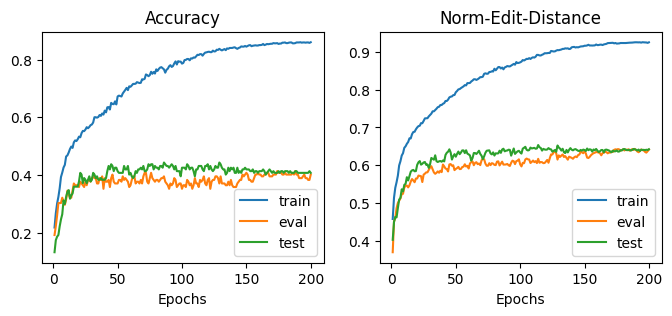

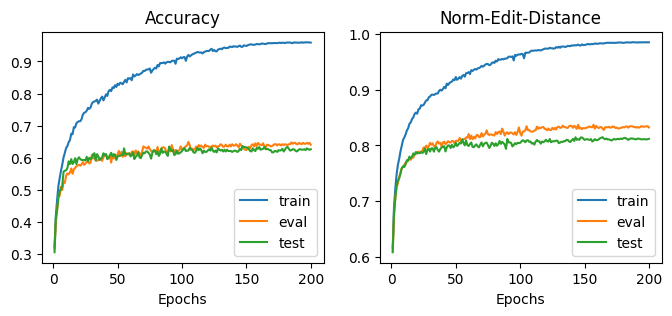

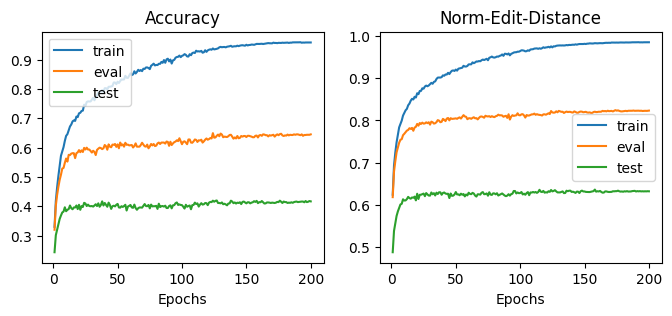

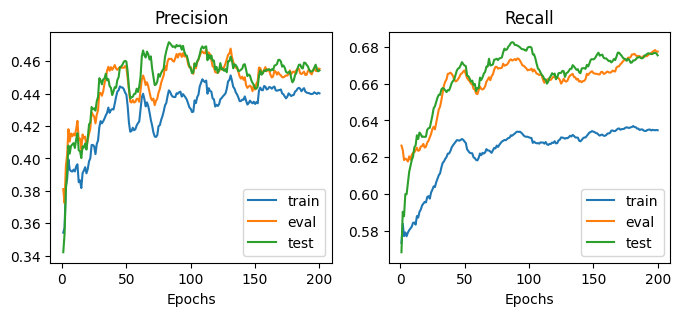

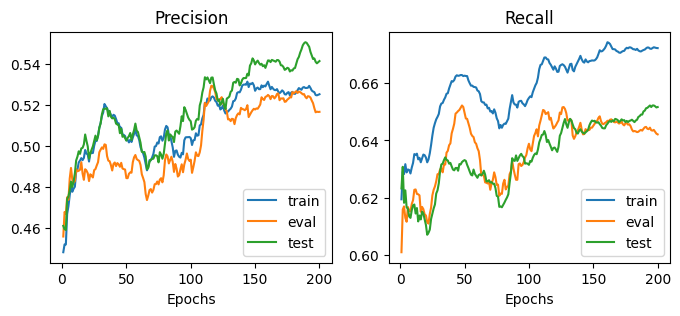

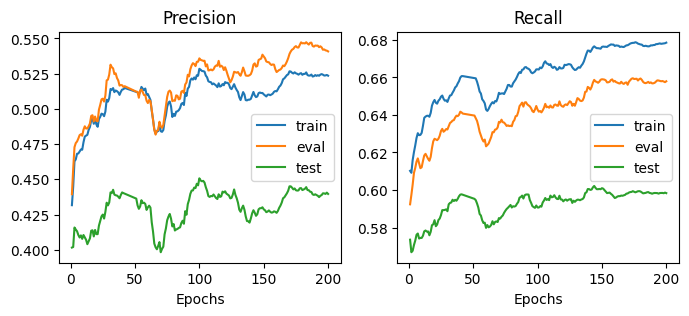

In [45]:
from database import *
import pandas as pd
import matplotlib.pyplot as plt

def smooth(x, window):
    new = []
    for i in range(len(x)):
        r = max(i-window+1, 0)
        q = i
        new.append(sum(x[r:q+1])/(q-r+1))
    return new

def draw_det_graph(id, window=1):
    plt.gcf().set_size_inches(8, 3)
    
    workdb = WorkDB()
    df = workdb.get_report_df(id).sort_values("version")
    plt.subplot(1, 2, 1)
    plt.title(f"Precision")
    plt.xlabel("Epochs")
    for task in ["train", "eval", "test"]:
        task_df = df[df["task"] == task]
        data = smooth(task_df["precision"], window=window)
        plt.plot(task_df["version"], data, label=f"{task}")
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.title(f"Recall")
    plt.xlabel("Epochs")
    for task in ["train", "eval", "test"]:
        task_df = df[df["task"] == task]
        data = smooth(task_df["recall"], window=window)
        plt.plot(task_df["version"], data, label=f"{task}")   
    plt.legend()
    
    # plt.suptitle(id)/
    
    return plt

def draw_rec_graph(id, window=1):
    plt.gcf().set_size_inches(8, 3)
    workdb = WorkDB()
    df = workdb.get_report_df(id).sort_values("version")
    
    plt.subplot(1, 2, 1)
    plt.title(f"Accuracy")
    plt.xlabel("Epochs")
    for task in ["train", "eval", "test"]:
        task_df = df[df["task"] == task]
        data = smooth(task_df["acc"], window=window)
        plt.plot(task_df["version"], data, label=f"{task}")
    plt.legend()
        
    plt.subplot(1, 2, 2)
    plt.title(f"Norm-Edit-Distance")
    plt.xlabel("Epochs")
    for task in ["train", "eval", "test"]:
        task_df = df[df["task"] == task]
        data = smooth(task_df["norm_edit_dis"], window=window)
        plt.plot(task_df["version"], data, label=f"{task}")    
    plt.legend()
    return plt


for work in ["rec_PPOCR_sangmu", "rec_PPOCR_outsourcing", "rec_PPOCR_sangmu_and_outsourcing"]:
    plt = draw_rec_graph(work)
    plt.savefig(f"{work}.svg", format="svg")
    plt.show()

for work in ["det_PPOCR_sangmu", "det_PPOCR_outsourcing", "det_PPOCR_sangmu_and_outsourcing"]:
    plt = draw_det_graph(work, window=10)
    plt.savefig(f"{work}.svg", format="svg")
    plt.show()




In [24]:
from database import *
id = "det_PPOCR_sangmu"
workdb = WorkDB()
data = []
for work in ["det_PPOCR_sangmu", "det_PPOCR_outsourcing", "det_PPOCR_sangmu_and_outsourcing"]:
    df = workdb.get_report_df(work)
    df = df[df["task"] == "test"]
    data.append(df.iloc[df["hmean"].argmax()])
    
pd.DataFrame(data)

,work_id,version,task,precision,recall,hmean,fps
0,det_PPOCR_sangmu,58.0,test,0.504723,0.683729,0.580745,4.878138
0,det_PPOCR_outsourcing,185.0,test,0.558057,0.650552,0.600765,6.715561
0,det_PPOCR_sangmu_and_outsourcing,33.0,test,0.468826,0.600000,0.526364,4.787488


In [25]:
from database import *
id = "det_PPOCR_sangmu"
workdb = WorkDB()
data = []
for work in ["rec_PPOCR_sangmu", "rec_PPOCR_outsourcing", "rec_PPOCR_sangmu_and_outsourcing"]:
    df = workdb.get_report_df(work)
    df = df[df["task"] == "test"]
    data.append(df.iloc[df["acc"].argmax()])
    
pd.DataFrame(data)

,work_id,version,task,acc,fps,norm_edit_dis
0,rec_PPOCR_sangmu,86.0,test,0.443114,45.568583,0.641388
0,rec_PPOCR_outsourcing,147.0,test,0.636490,184.571147,0.814190
0,rec_PPOCR_sangmu_and_outsourcing,127.0,test,0.419670,485.416639,0.634543
